In [2]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Importing .csv and creating a datafame

JEOPARDY_CSV_path = "C:/Users/Nik/Documents/LaunchCoderGirlSTL/JEOPARDY_CSV.csv"
JEOPARDY_df = pd.read_csv(JEOPARDY_CSV_path)
JEOPARDY_df

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


#### 1. Import jeopardy.csv and create a dataframe from the data. Find out the following:

a. How many rows are there in the dataframe? What does a row represent in this
dataset? What is the “grain”?

b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

c. How many unique shows were there each year?

d. How many times was each category used?

e. Which month (over the years) has had the most shows?

f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

# 1.a.

In [4]:
# Show number of rows:

print(len(JEOPARDY_df))

216930


There are 216930 rows in the data frame. The rows are the index; in this answer they represent correct answers from the game show Jeapordy! with their corresponding question, the dollar value of giving the correct answer, category of question, 
type of game round, air date, and episode number. With this data set, the 'grain', or lowest level of organized data, is either the Jeopardy! answers or possibly the questions since they are both unique.

# 1.b.

Clean data would be data that has had missing values handled in some way, has
removed exact duplicates, and has ensured uniform formatting. Use other data to model missing data.

In [28]:
# Detecting and isolating missing data:
JEOPARDY_df.isna().sum()


Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [20]:
# The above search indicates that there are two points of missing data somewhere in the 'Answer' column.
# Let's look for it using:

Missing_Data_Indeces = np.where(JEOPARDY_df.isna())[0]
Missing_Data_Indeces

array([ 94817, 143297], dtype=int64)

In [27]:
# Slicing the rows with missing data to examine them and see if I can 'fix' 
# the missing data.

Rows_Missing_Data = pd.DataFrame(JEOPARDY_df.iloc[[94817,143297]])
Rows_Missing_Data

,Show Number,Air Date,Round,Category,Value,Question,Answer
94817,4346,6/23/2003,Jeopardy!,"GOING ""N""SANE",$200,"It often precedes ""and void""",NaN
143297,6177,6/21/2011,Double Jeopardy!,NOTHING,$400,"This word for ""nothing"" precedes ""and void"" to...",NaN


In [48]:
# By looking at the missing rows, I can reason that the missing answers are the
# literal word "Null" and that word broke it data entry and read as a NaN by 
# mistake. Will fix by .fillna()
JEOPARDY_df = JEOPARDY_df.fillna('Null')
JEOPARDY_df.iloc[[94817,143297]]

,Show Number,Air Date,Round,Category,Value,Question,Answer
94817,4346,6/23/2003,Jeopardy!,"GOING ""N""SANE",$200,"It often precedes ""and void""",Null
143297,6177,6/21/2011,Double Jeopardy!,NOTHING,$400,"This word for ""nothing"" precedes ""and void"" to...",Null


In [62]:
# Another way to clean up data is to *carefully* check/drop duplicate data.
# With this dataframe, it is important to look for duplicate ROWS since there
# are many instances of legitimately duplicated data like Show Numbers or Values.
# I will check for duplicate rows:

#JEOPARDY_df.groupby(' Air Date')['Show Number'].agg(pd.Series.drop_duplicates)
unique_JEOPARDY_df = JEOPARDY_df.drop_duplicates(subset=['Show Number', ' Air Date', ' Round', ' Category', ' Value', ' Question', ' Answer'])
print(len(unique_JEOPARDY_df),len(JEOPARDY_df))

# There are no exact duplicate rows, so I think this data is now as clean as I can readily make it.

216930 216930


# 1.c.

In [64]:
JEOPARDY_df.groupby(' Air Date')['Show Number'].agg(pd.Series.drop_duplicates)
#JEOPARDY_df.drop_duplicates(subset=[' Air Date', 'Show Number'])
#print(len(jeopardy_df))
JEOPARDY_df[' Air Date'] = pd.to_datetime(JEOPARDY_df[' Air Date'])
#JEOPARDY_df['Year'] = JEOPARDY_df[' Air Date'].dt.year
Unique_Shows_per_Year = pd.DataFrame(JEOPARDY_df.groupby(JEOPARDY_df[' Air Date'].dt.year)['Show Number'].nunique())
Unique_Shows_per_Year.columns = ['Number of Shows']
Unique_Shows_per_Year.T

Air Date,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Number of Shows,23,16,25,22,22,36,73,24,32,35,...,158,220,225,230,231,232,226,231,224,19


# 1.d.

In [212]:
# Here I sorted, then counted, the Category column:
Categories_df = pd.DataFrame(JEOPARDY_df[' Category'].value_counts())
Categories_df.columns = ['Times Cat. Used']
Categories_df

,Times Cat. Used
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
POTPOURRI...NO FOOLIN',1
BRITISH PAINTERS,1
MIDWAY ISLAND,1
THE OXFORD ENGLISH DICTIONARY,1


# 1.e

In [85]:
# I interpreted the question to be asking which month had the most shows when summing all the shows for that month in every year.
# Here I am splitting the DataFrame dates into components, and then isolating the month, and counting number of shows per each month.
JEOPARDY_df.groupby(' Air Date')['Show Number'].agg(pd.Series.drop_duplicates)
JEOPARDY_df[' Air Date'] = pd.to_datetime(JEOPARDY_df[' Air Date'])
Unique_Shows_per_Month = pd.DataFrame(JEOPARDY_df.groupby(JEOPARDY_df[' Air Date'].dt.month)['Show Number'].nunique())
Unique_Shows_per_Month.columns = ['Number of Shows']
#Unique_Shows_per_Month

#Now I will sort descending and show first row:

Unique_Shows_per_Month.sort_values('Number of Shows', ascending=False).head(1)

,Number of Shows
Air Date,
11,434


# 1.f.

In [95]:
# I find the 3 most common answers with a value count and head(3):

Most_Common_Answers = pd.DataFrame(JEOPARDY_df[' Answer'].value_counts())
Most_Common_Answers.head(3)

,Answer
China,216
Australia,215
Japan,196


In [187]:
#Now I will take my most popular answers and create a new dataframe:

China = pd.DataFrame(JEOPARDY_df[JEOPARDY_df[" Answer"]=='China'][[' Answer',' Question']])
Australia = pd.DataFrame(JEOPARDY_df[JEOPARDY_df[" Answer"]=='Australia'][[' Answer',' Question']])
Japan = pd.DataFrame(JEOPARDY_df[JEOPARDY_df[" Answer"]=='Japan'][[' Answer',' Question']])


All_Answers = [China, Australia, Japan]

Questions = pd.concat(All_Answers)
Questions

,Answer,Question
598,China,In 1958 this country launched its second 5-yea...
1507,China,"In 1999 this country began 3 ""golden weeks"" of..."
3050,China,P.F. Chang's is an upscale bistro specializing...
3476,China,This country's National People's Congress has ...
5990,China,"Of the 6 nations India borders, this one is th..."
...,...,...
211129,Japan,"On Feb. 8, 1904 this country attacked Port Art..."
214711,Japan,"This nation's maritime self-defense force, suc..."
215513,Japan,"On July 8, 1853 Matthew Perry presented a lett..."
215568,Japan,Kirin


#### 2. Create a visualization that shows the top 5 categories (those referenced the most often). 

Be sure to label appropriately.

In [213]:
Most_Popular_Categories = Categories_df.head()
Most_Popular_Categories

,Times Cat. Used
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


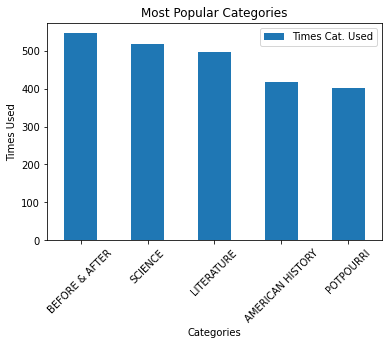

In [221]:
Most_Popular_Categories.plot(kind='bar')
plt.xticks(rotation = 45)
plt.title('Most Popular Categories')
plt.xlabel('Categories')
plt.ylabel('Times Used')
plt.show()